In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad
import seaborn as sns
import muon as mu
from muon import atac as ac
import random
import os
import openpyxl
import scipy
from scipy.stats import median_abs_deviation
import sys
import scipy.stats as stats

sys.path.append(os.path.abspath("/Users/alexandra/Desktop/EG-CLR/Functions"))

from Verfication_functions import *

In [2]:
import pickle

with open('/Users/alexandra/Desktop/EG-CLR/Test/results/ChrX_51Genes_S1_Binarized_10K_K562_5.28.25.pkl', 'rb') as file:
    MI_Matrix = pickle.load(file)

In [3]:
GATA1_MI = MI_Matrix["GATA1"].copy()

In [12]:
GATA1_MI_shift = GATA1_MI + 0.0001

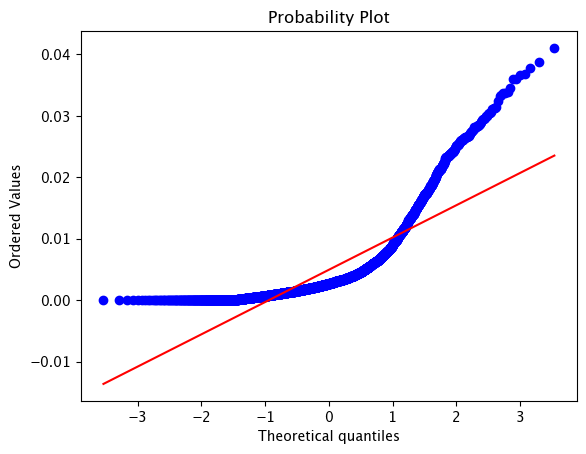

In [13]:
from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(GATA1_MI_shift, dist="norm", plot=plt)
plt.show()

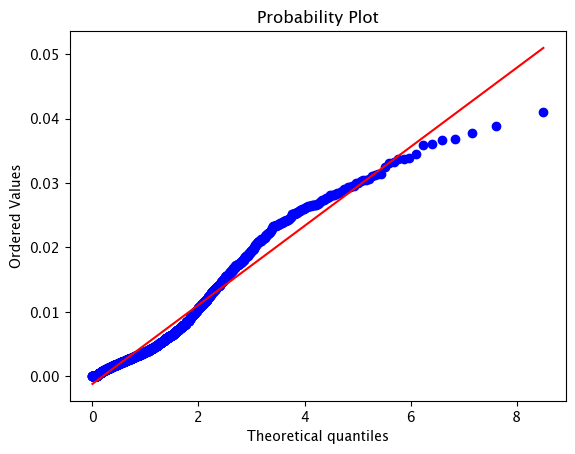

In [14]:
stats.probplot(GATA1_MI_shift, dist="expon", plot=plt)
plt.show()

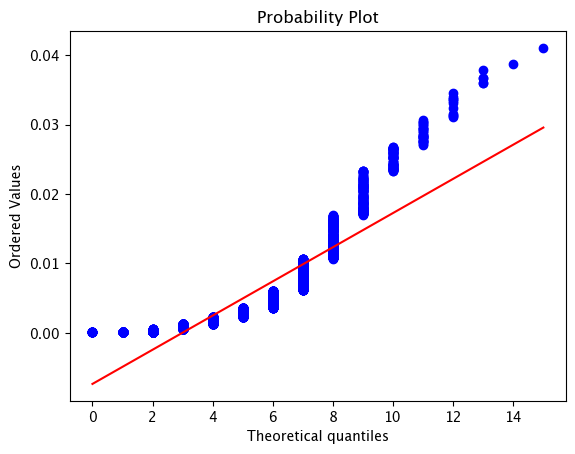

In [15]:
stats.probplot(GATA1_MI_shift, dist=stats.poisson(5), plot=plt)
plt.show()

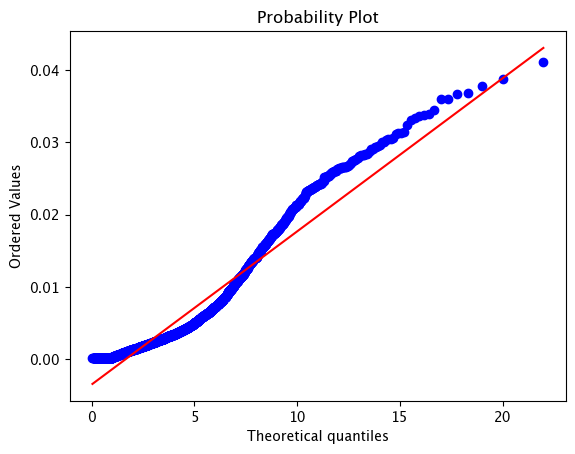

In [11]:
stats.probplot(GATA1_MI_shift, dist=stats.gamma(a=2, scale=2), plot=plt)
plt.show()

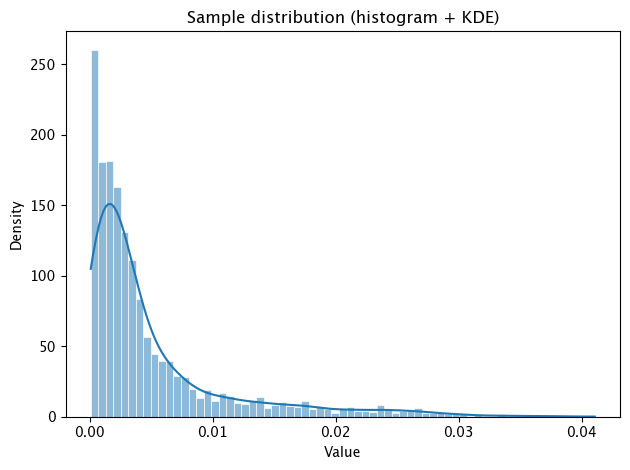

In [16]:
plt.figure()
sns.histplot(GATA1_MI_shift, kde=True, stat='density', bins='auto', edgecolor='white')
plt.title('Sample distribution (histogram + KDE)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.tight_layout()

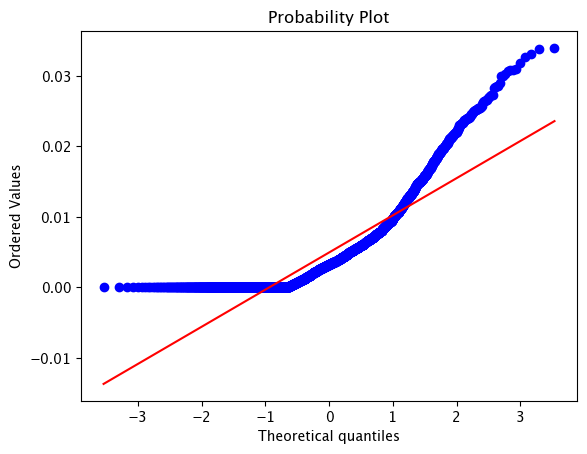

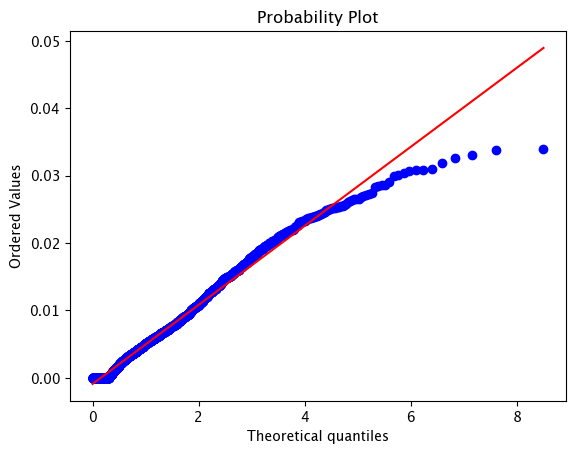

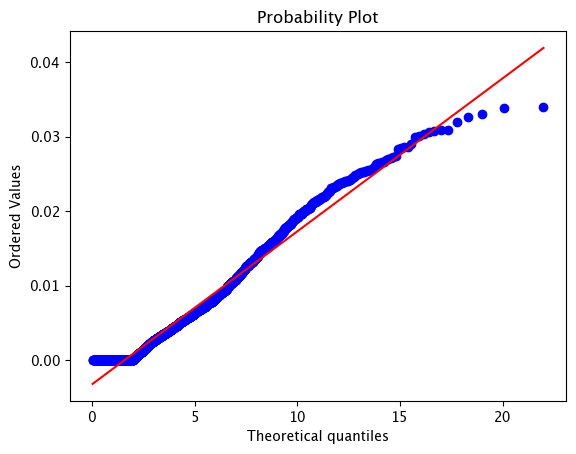

In [9]:
ARHGAP6_MI = MI_Matrix["ARHGAP6"].copy()


stats.probplot(ARHGAP6_MI, dist="norm", plot=plt)
plt.show()

stats.probplot(ARHGAP6_MI, dist="expon", plot=plt)
plt.show()

stats.probplot(ARHGAP6_MI, dist=stats.gamma(a=2, scale=2), plot=plt)
plt.show()


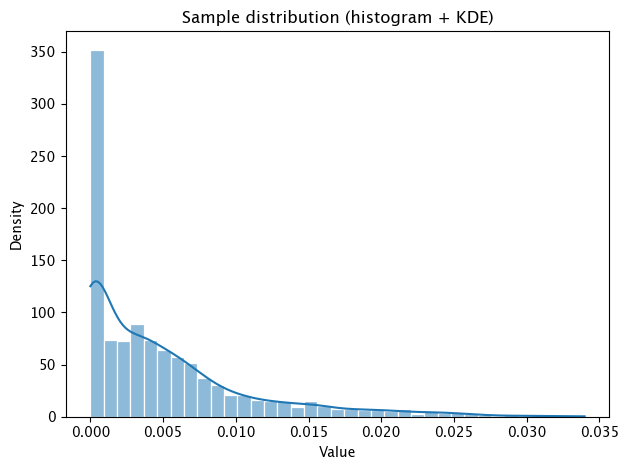

In [10]:
plt.figure()
sns.histplot(ARHGAP6_MI, kde=True, stat='density', bins='auto', edgecolor='white')
plt.title('Sample distribution (histogram + KDE)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.tight_layout()

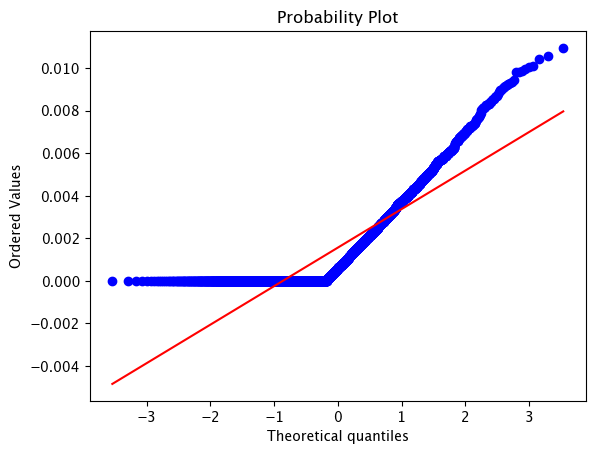

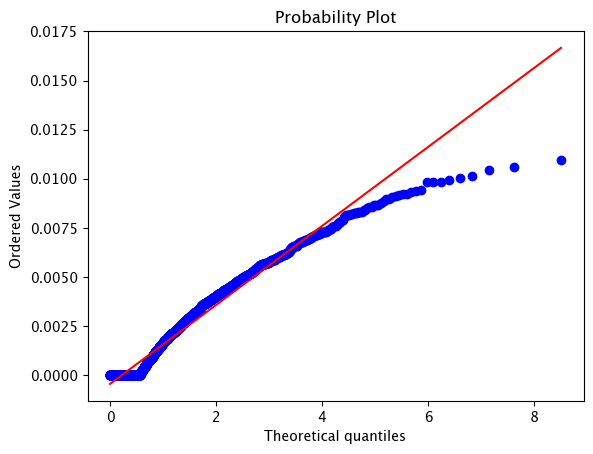

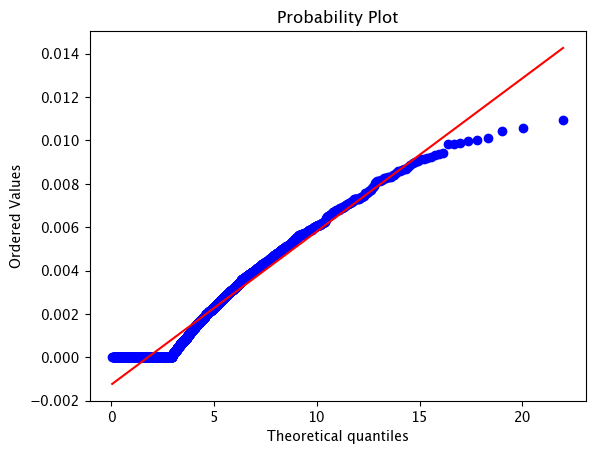

In [11]:
TAZ_MI = MI_Matrix["TAZ"].copy()


stats.probplot(TAZ_MI, dist="norm", plot=plt)
plt.show()

stats.probplot(TAZ_MI, dist="expon", plot=plt)
plt.show()

stats.probplot(TAZ_MI, dist=stats.gamma(a=2, scale=2), plot=plt)
plt.show()

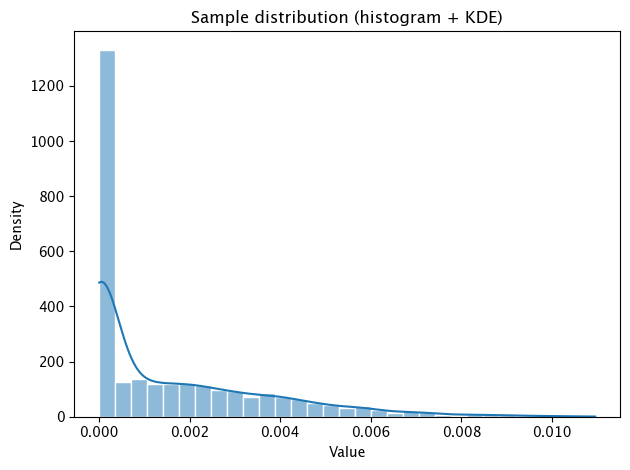

In [12]:
plt.figure()
sns.histplot(TAZ_MI, kde=True, stat='density', bins='auto', edgecolor='white')
plt.title('Sample distribution (histogram + KDE)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.tight_layout()

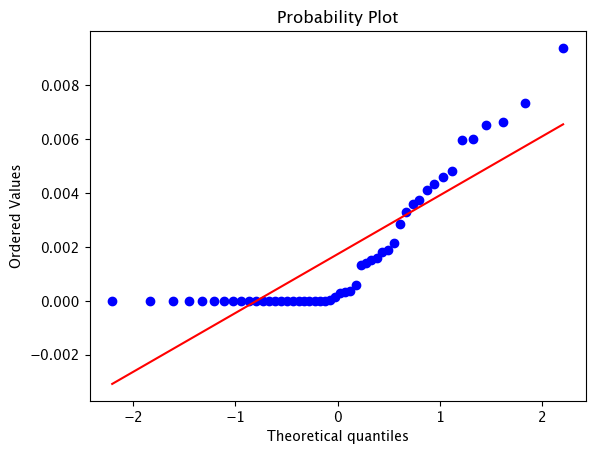

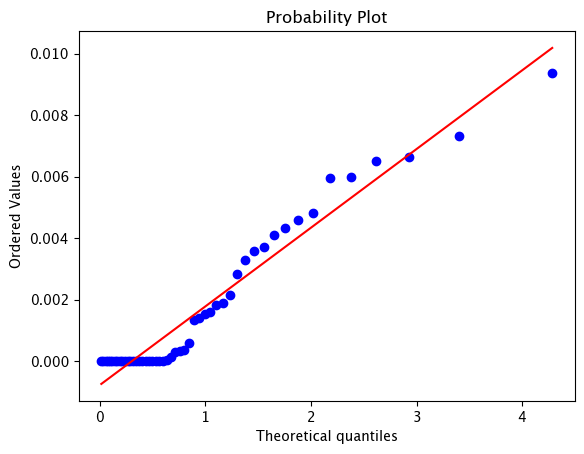

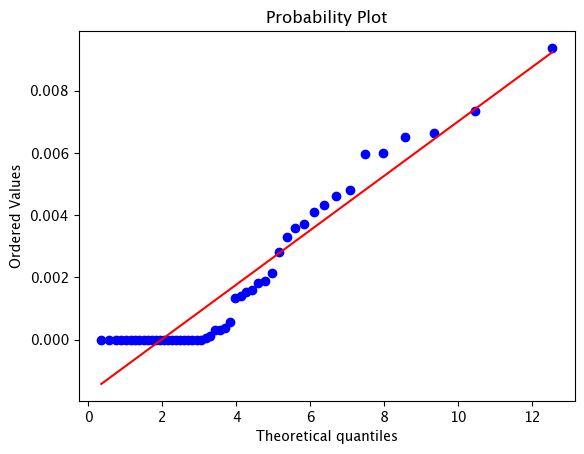

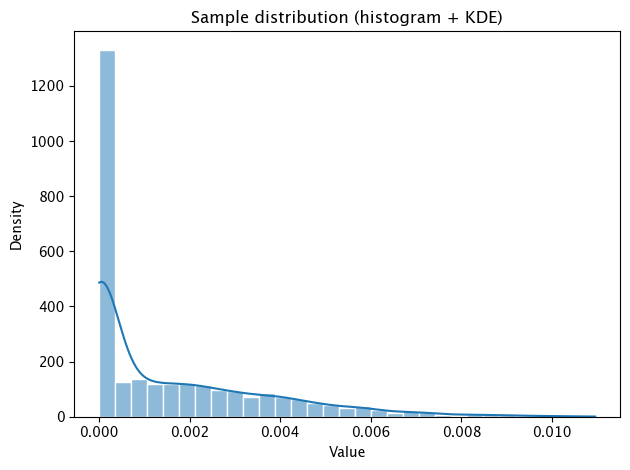

In [39]:
chrX_62333_63291_MI = MI_Matrix.loc["chrX:62333-63291"]


stats.probplot(chrX_62333_63291_MI, dist="norm", plot=plt)
plt.show()

stats.probplot(chrX_62333_63291_MI, dist="expon", plot=plt)
plt.show()

stats.probplot(chrX_62333_63291_MI, dist=stats.gamma(a=2, scale=2), plot=plt)
plt.show()

plt.figure()
sns.histplot(TAZ_MI, kde=True, stat='density', bins='auto', edgecolor='white')
plt.title('Sample distribution (histogram + KDE)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.tight_layout()

# CLR but in different distribution

In [31]:
# fit Gamma

GATA1_MI_shifted = GATA1_MI + 1e-6  # Shift the data to avoid zero values

k_hat, loc_hat, theta_hat = stats.gamma.fit(GATA1_MI_shifted, floc=0)   
gamma_dist = stats.gamma(k_hat, loc=loc_hat, scale=theta_hat)

sf = gamma_dist.sf(GATA1_MI_shifted)

p_vals = np.ones_like(GATA1_MI_shifted)
p_vals[GATA1_MI_shifted > 0] = sf
p_5 = p_vals[p_vals < 0.05]


In [32]:
p_5

array([0.03518956, 0.03842801, 0.04311084, 0.02576931, 0.04274335,
       0.04858669, 0.02897137, 0.03189098, 0.0422768 , 0.04476333,
       0.04774449, 0.04719956, 0.04936673, 0.03995215, 0.01921561,
       0.01754533, 0.04768729, 0.0385679 , 0.03204703, 0.02196476,
       0.04081092, 0.04309157, 0.04908739, 0.02177537, 0.04388677,
       0.03615165, 0.0389822 , 0.04543304, 0.03441277, 0.037178  ,
       0.04517684, 0.03861689, 0.04427864, 0.03232864, 0.0418848 ,
       0.04826156, 0.03982899, 0.02574357, 0.04435691, 0.04596561,
       0.04103176, 0.04673042, 0.04701957])

<Axes: ylabel='Count'>

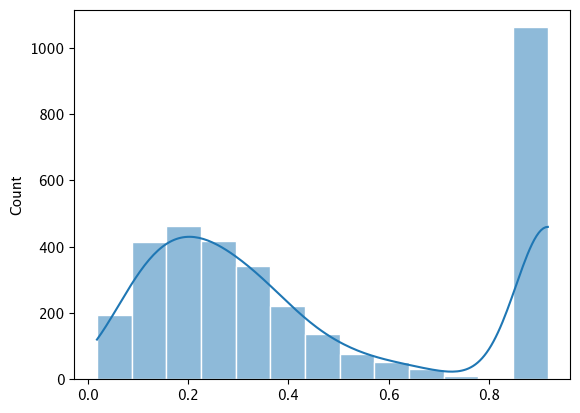

In [24]:

sns.histplot(p_vals, kde=True, bins='auto', edgecolor='white')


In [19]:
k_hat, loc_hat, theta_hat 

(0.268148581406294, 0, np.float64(0.01633980160063909))